## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

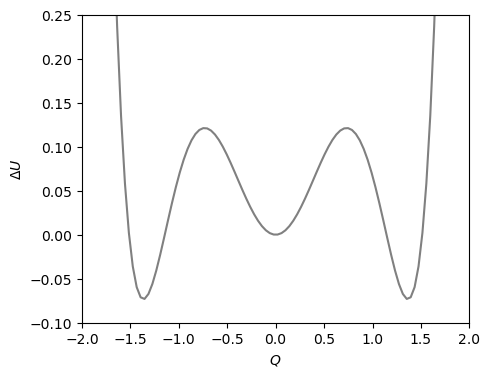

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

### **Pseudocode**

1. **Define the System:**
   - Specify constants \(K, D, Phi, M) for the potential energy function.
   - Write the potential energy function and its derivatives.

2. **Set up the Equation of Motion:**
   - Use Newton's second law: \( \ddot{Q} = -\frac{dU}{dQ} \).
   - Represent this as a first-order system of ODEs for numerical integration.

3. **Calculate the Period for Given \( Q_0 \):**
   - Solve the equation of motion for initial conditions \( Q_0 \) and \( \dot{Q}(0) = 0 \).
   - Identify the peaks of \( Q(t) \) and compute the period \( T \) as the time between peaks.

4. **Handle Special Cases:**
   - For \( Q_0 = 0 \), use the small-amplitude analytic solution: \( \omega = \sqrt{\frac{1}{M} \frac{d^2U}{dQ^2}} \).

5. **Generate Data for \( Q_0 \):**
   - Create an array of \( Q_0 \) values.
   - Compute \( \omega \) for each \( Q_0 \) using the above methods.

6. **Plot \( \omega \) vs \( Q_0 \):**
   - Use `matplotlib` to create the plot.

### **Expanded Pseudocode**

#### **Custom Function 1: `potential_energy(Q)`**
- **Input:** \( Q \) (position)
- **Output:** \( U(Q) \), the potential energy
- **Test Cases:**
  - \( Q = 0 \): \( U(0) = 0 \)
  - \( Q = 1 \): \( U(1) = 0.5K - 0.25D + \frac{1}{6}\Phi \)

#### **Custom Function 2: `potential_derivative(Q)`**
- **Input:** \( Q \) (position)
- **Output:** \( \frac{dU}{dQ} \), the derivative of the potential energy
- **Test Cases:**
  - \( Q = 0 \): \( \frac{dU}{dQ}(0) = 0 \)
  - \( Q = 1 \): \( \frac{dU}{dQ}(1) = K - D + \Phi \)

#### **Custom Function 3: `find_period(Q0)`**
- **Input:** \( Q_0 \) (initial amplitude)
- **Output:** \( T \), the period of oscillation
- **Test Cases:**
  - \( Q_0 = 0 \): Should return `None` (or analytic result)
  - \( Q_0 = 1 \): Should return \( T \) after numerical integration.

#### **Custom Function 4: `compute_omega(Q0_vals)`**
- **Input:** Array of \( Q_0 \) values
- **Output:** Array of \( \omega \) values
- **Test Cases:**
  - Input: \( Q_0 = [0, 0.5, 1] \)
  - Output: Correct \( \omega \) values for small, medium, and large amplitudes.

#### **Custom Function 5: `plot_omega_vs_Q0(Q0_vals, omega_vals)`**
- **Input:** Arrays \( Q_0 \), \( \omega \)
- **Output:** Plot of \( \omega \) vs \( Q_0 \)
- **Test Cases:**
  - Validate visually that the plot is generated correctly.


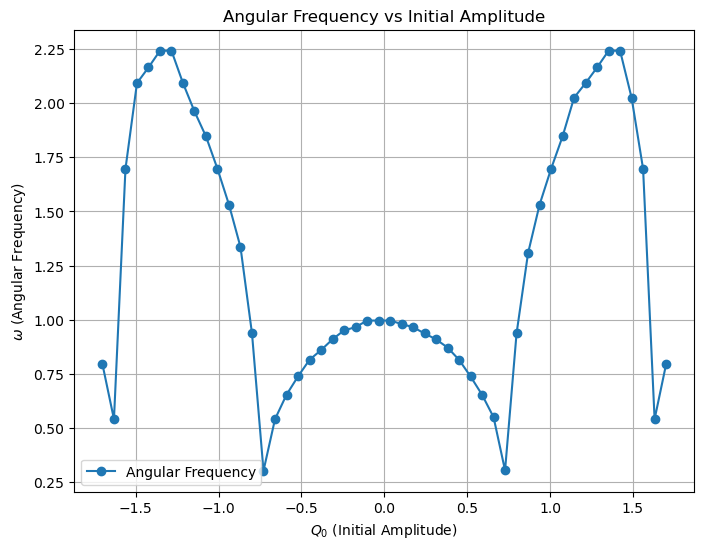

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Constants
K = 1
D = 2.4
Phi = 1
M = 1

def potential_energy(Q):
    return 0.5 * K * Q**2 - 0.25 * D * Q**4 + (1/6) * Phi * Q**6

def potential_derivative(Q):
    return K * Q - D * Q**3 + Phi * Q**5

def potential_second_derivative(Q):
    return K - 3 * D * Q**2 + 5 * Phi * Q**4

def equation_of_motion(t, y):
    Q, P = y  # Position and momentum
    dQ_dt = P / M
    dP_dt = -potential_derivative(Q)
    return [dQ_dt, dP_dt]

def find_period(Q0, t_max=100, num_points=1000):
    t_span = (0, t_max)
    t_eval = np.linspace(*t_span, num_points)
    sol = solve_ivp(
        equation_of_motion,
        t_span,
        [Q0, 0],  # Initial conditions: Q0, P0 = 0
        t_eval=t_eval,
        method='RK45'
    )
    Q = sol.y[0]
    t = sol.t
    
    
    peaks = np.where((Q[1:-1] > Q[:-2]) & (Q[1:-1] > Q[2:]))[0] + 1
    if len(peaks) > 1:
        T = t[peaks[1]] - t[peaks[0]]  # Time between first two peaks
        return T
    return None  # No oscillation


Q0_vals = np.linspace(-1.7, 1.7, 50)
omega_vals = []

for Q0 in Q0_vals:
    if Q0 == 0:  # Stationary solution
        omega = np.sqrt(potential_second_derivative(0) / M)
    else:
        T = find_period(Q0)
        omega = 2 * np.pi / T if T else None
    omega_vals.append(omega)


plt.figure(figsize=(8, 6))
plt.plot(Q0_vals, omega_vals, marker='o', label='Angular Frequency')
plt.xlabel('$Q_0$ (Initial Amplitude)')
plt.ylabel('$\omega$ (Angular Frequency)')
plt.title('Angular Frequency vs Initial Amplitude')
plt.grid()
plt.legend()
plt.show()


5. The plot shows scalar symmetry since the omega looks the same on both the positive and negative sides of the initial amplitude. The plot also looks like an inverse of a double well where instead of local minimas we have local maximas. 